# Smart Water Analytics

Este proyecto dará solución al problema propuesto por la competición homonima en Kaggle.  
El principal objetivo de la competición es encontrar un modelo que prediga o determine que features son relevantes para la disponibilidad de agua, en cada tipo de cuerpo de agua. Los tipos de cuerpos de agua son. 
- acuíferos 
- ríos
- lagos. 
- manantiales

El outcome deseado es tener cuatro modelos predictores, uno por cada tipo de cuerpo de agua (acuíferos, cascadas, ríos y lagos).

# 1. Preparación del Entorno. 

Antes de cargar los datos, se importarán las librerías que se requerirán:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np


# 2. Carga de Datos y EDA inicial. 

## Carga de Datos. 

### Water Spring. 

In [3]:
# Aquifer Auser
df_ws_a = pd.read_csv("../data/raw/Water_Spring_Amiata.csv")
df_ws_a.head()


Date  Rainfall_Castel_del_Piano  Rainfall_Abbadia_S_Salvatore  \
0  01/01/2000                        NaN                           NaN   
1  02/01/2000                        NaN                           NaN   
2  03/01/2000                        NaN                           NaN   
3  04/01/2000                        NaN                           NaN   
4  05/01/2000                        NaN                           NaN   

   Rainfall_S_Fiora  Rainfall_Laghetto_Verde  Rainfall_Vetta_Amiata  \
0               NaN                      NaN                    NaN   
1               NaN                      NaN                    NaN   
2               NaN                      NaN                    NaN   
3               NaN                      NaN                    NaN   
4               NaN                      NaN                    NaN   

   Depth_to_Groundwater_S_Fiora_8  Depth_to_Groundwater_S_Fiora_11bis  \
0                             NaN                                 NaN   
1                             NaN                                 NaN   
2                             NaN                                 NaN   
3                             NaN                                 NaN   
4                             NaN                                 NaN   

   Depth_to_Groundwater_David_Lazzaretti  Temperature_Abbadia_S_Salvatore  \
0                                    NaN                              NaN   
1                                    NaN                              NaN   
2                                    NaN                              NaN   
3                                    NaN                              NaN   
4                                    NaN                              NaN   

   Temperature_S_Fiora  Temperature_Laghetto_Verde  Flow_Rate_Bugnano  \
0                -0.15                         NaN                NaN   
1                 1.55                         NaN                NaN   
2                 2.70                         NaN                NaN   
3                 4.00                         NaN                NaN   
4                 4.60                         NaN                NaN   

   Flow_Rate_Arbure  Flow_Rate_Ermicciolo  Flow_Rate_Galleria_Alta  
0               NaN                   NaN                      NaN  
1               NaN                   NaN                      NaN  
2               NaN                   NaN                      NaN  
3               NaN                   NaN                      NaN  
4               NaN                   NaN                      NaN

In [4]:
df_ws_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   7487 non-null   object 
 1   Rainfall_Castel_del_Piano              6291 non-null   float64
 2   Rainfall_Abbadia_S_Salvatore           3586 non-null   float64
 3   Rainfall_S_Fiora                       2633 non-null   float64
 4   Rainfall_Laghetto_Verde                2865 non-null   float64
 5   Rainfall_Vetta_Amiata                  2212 non-null   float64
 6   Depth_to_Groundwater_S_Fiora_8         3569 non-null   float64
 7   Depth_to_Groundwater_S_Fiora_11bis     3594 non-null   float64
 8   Depth_to_Groundwater_David_Lazzaretti  3242 non-null   float64
 9   Temperature_Abbadia_S_Salvatore        3583 non-null   float64
 10  Temperature_S_Fiora                    7487 non-null   float64
 11  Temp

In [5]:
df_ws_a.describe()

Rainfall_Castel_del_Piano  Rainfall_Abbadia_S_Salvatore  \
count                6291.000000                   3586.000000   
mean                    2.624034                      3.784830   
std                     7.997019                     11.358671   
min                     0.000000                      0.000000   
25%                     0.000000                      0.000000   
50%                     0.000000                      0.000000   
75%                     0.600000                      1.400000   
max                   149.600000                    228.500000   

       Rainfall_S_Fiora  Rainfall_Laghetto_Verde  Rainfall_Vetta_Amiata  \
count       2633.000000              2865.000000            2212.000000   
mean           4.095784                 4.332845               2.866456   
std           11.861017                12.143496               7.471131   
min            0.000000                 0.000000               0.000000   
25%            0.000000                 0.000000               0.000000   
50%            0.000000                 0.000000               0.000000   
75%            1.800000                 1.800000               1.400000   
max          220.000000               165.200000              79.200000   

       Depth_to_Groundwater_S_Fiora_8  Depth_to_Groundwater_S_Fiora_11bis  \
count                     3569.000000                          3594.00000   
mean                       -38.118649                           -51.64424   
std                          1.239967                             0.93864   
min                        -40.790000                           -53.64000   
25%                        -39.240000                           -52.44000   
50%                        -38.120000                           -51.65000   
75%                        -36.930000                           -50.76000   
max                        -36.380000                           -50.24000   

       Depth_to_Groundwater_David_Lazzaretti  Temperature_Abbadia_S_Salvatore  \
count                            3242.000000                      3583.000000   
mean                             -302.697412                        12.159503   
std                                 7.641590                         7.085829   
min                              -314.710000                        -8.450000   
25%                              -309.435000                         6.700000   
50%                              -303.365000                        11.750000   
75%                              -295.332500                        17.650000   
max                              -290.580000                        30.150000   

       Temperature_S_Fiora  Temperature_Laghetto_Verde  Flow_Rate_Bugnano  \
count          7487.000000                 3604.000000        2008.000000   
mean             11.248898                   10.788166          -0.259413   
std               6.818232                    6.711271           0.130209   
min              -8.950000                   -8.550000          -0.385529   
25%               5.950000                    5.400000          -0.348533   
50%              11.050000                   10.450000          -0.319199   
75%              16.750000                   15.950000          -0.219417   
max              28.200000                   28.000000           0.000000   

       Flow_Rate_Arbure  Flow_Rate_Ermicciolo  Flow_Rate_Galleria_Alta  
count       2008.000000           2008.000000              2008.000000  
mean          -2.009348             -4.507117               -20.972385  
std            1.062751              1.465277                 2.034663  
min           -3.042149             -6.469258               -26.089554  
25%           -2.785148             -5.422521               -22.485956  
50%           -2.491041             -4.862256               -20.718974  
75%           -1.695151             -3.872881               -19.241000  
max            0.000000           

In [9]:
# Water Spirng Lupa
df_ws_l = pd.read_csv("../data/raw/Water_Spring_Lupa.csv")
df_ws_l.head()

Date  Rainfall_Terni  Flow_Rate_Lupa
0  01/01/2009           2.797             NaN
1  02/01/2009           2.797             NaN
2  03/01/2009           2.797             NaN
3  04/01/2009           2.797             NaN
4  05/01/2009           2.797             NaN

In [7]:
df_ws_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4199 non-null   object 
 1   Rainfall_Terni  4199 non-null   float64
 2   Flow_Rate_Lupa  3817 non-null   float64
dtypes: float64(2), object(1)
memory usage: 98.5+ KB


In [8]:
df_ws_l.describe()

Rainfall_Terni  Flow_Rate_Lupa
count     4199.000000     3817.000000
mean         2.466355      -97.712916
std          2.041837       15.026314
min          0.000000     -182.310000
25%          1.402000     -105.760000
50%          2.142000      -96.590000
75%          3.165000      -87.220000
max         76.000000        0.000000

In [12]:
# Water Spring Lupa
df_ws_m = pd.read_csv("../data/raw/Water_Spring_Madonna_di_Canneto.csv")
df_ws_m.head()

Date  Rainfall_Settefrati  Temperature_Settefrati  \
0  01/01/2012                  0.0                    5.25   
1  02/01/2012                  5.6                    6.65   
2  03/01/2012                 10.0                    8.85   
3  04/01/2012                  0.0                    6.75   
4  05/01/2012                  1.0                    5.55   

   Flow_Rate_Madonna_di_Canneto  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  
4                           NaN

In [13]:
df_ws_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          3104 non-null   object 
 1   Rainfall_Settefrati           2557 non-null   float64
 2   Temperature_Settefrati        2557 non-null   float64
 3   Flow_Rate_Madonna_di_Canneto  1387 non-null   float64
dtypes: float64(3), object(1)
memory usage: 97.4+ KB


In [14]:
df_ws_m.describe()

Rainfall_Settefrati  Temperature_Settefrati  \
count          2557.000000             2557.000000   
mean              4.252444               13.561732   
std              10.242426                6.959375   
min               0.000000               -4.900000   
25%               0.000000                7.600000   
50%               0.000000               13.300000   
75%               3.600000               19.050000   
max             140.800000               31.100000   

       Flow_Rate_Madonna_di_Canneto  
count                   1387.000000  
mean                     263.160470  
std                       32.073660  
min                      187.753182  
25%                      224.659081  
50%                      277.045159  
75%                      290.165584  
max                      300.160983

## __EDA Inicial.__

### __Water Spring Amiata.__
---

#### __Análisis Univariable.__ 

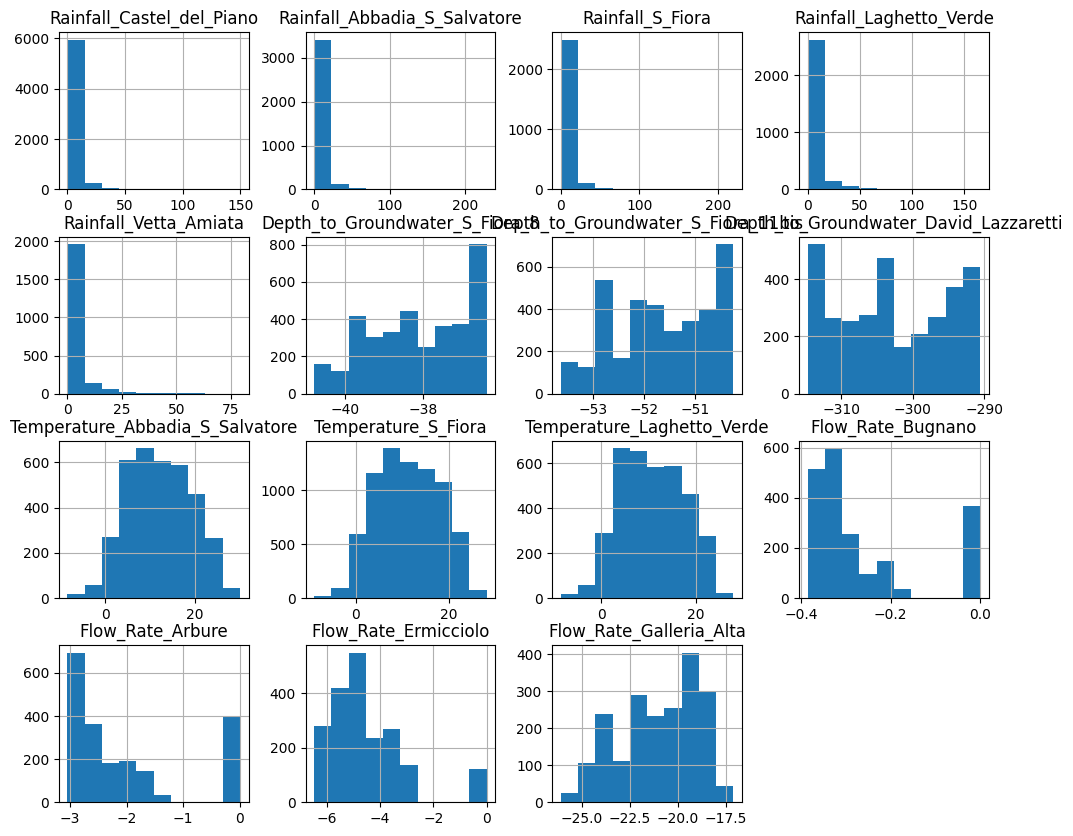

In [15]:
df_ws_a.hist(figsize=(12,10))
plt.show()

In [16]:
df_ws_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   7487 non-null   object 
 1   Rainfall_Castel_del_Piano              6291 non-null   float64
 2   Rainfall_Abbadia_S_Salvatore           3586 non-null   float64
 3   Rainfall_S_Fiora                       2633 non-null   float64
 4   Rainfall_Laghetto_Verde                2865 non-null   float64
 5   Rainfall_Vetta_Amiata                  2212 non-null   float64
 6   Depth_to_Groundwater_S_Fiora_8         3569 non-null   float64
 7   Depth_to_Groundwater_S_Fiora_11bis     3594 non-null   float64
 8   Depth_to_Groundwater_David_Lazzaretti  3242 non-null   float64
 9   Temperature_Abbadia_S_Salvatore        3583 non-null   float64
 10  Temperature_S_Fiora                    7487 non-null   float64
 11  Temp

__Observaciones:__  
Como se puede observar en la visualización anterior, en algunas variables existen outliers, por lo que se analizará que tan viable es coservarlos.

#### __Análisis Bivariado.__ 

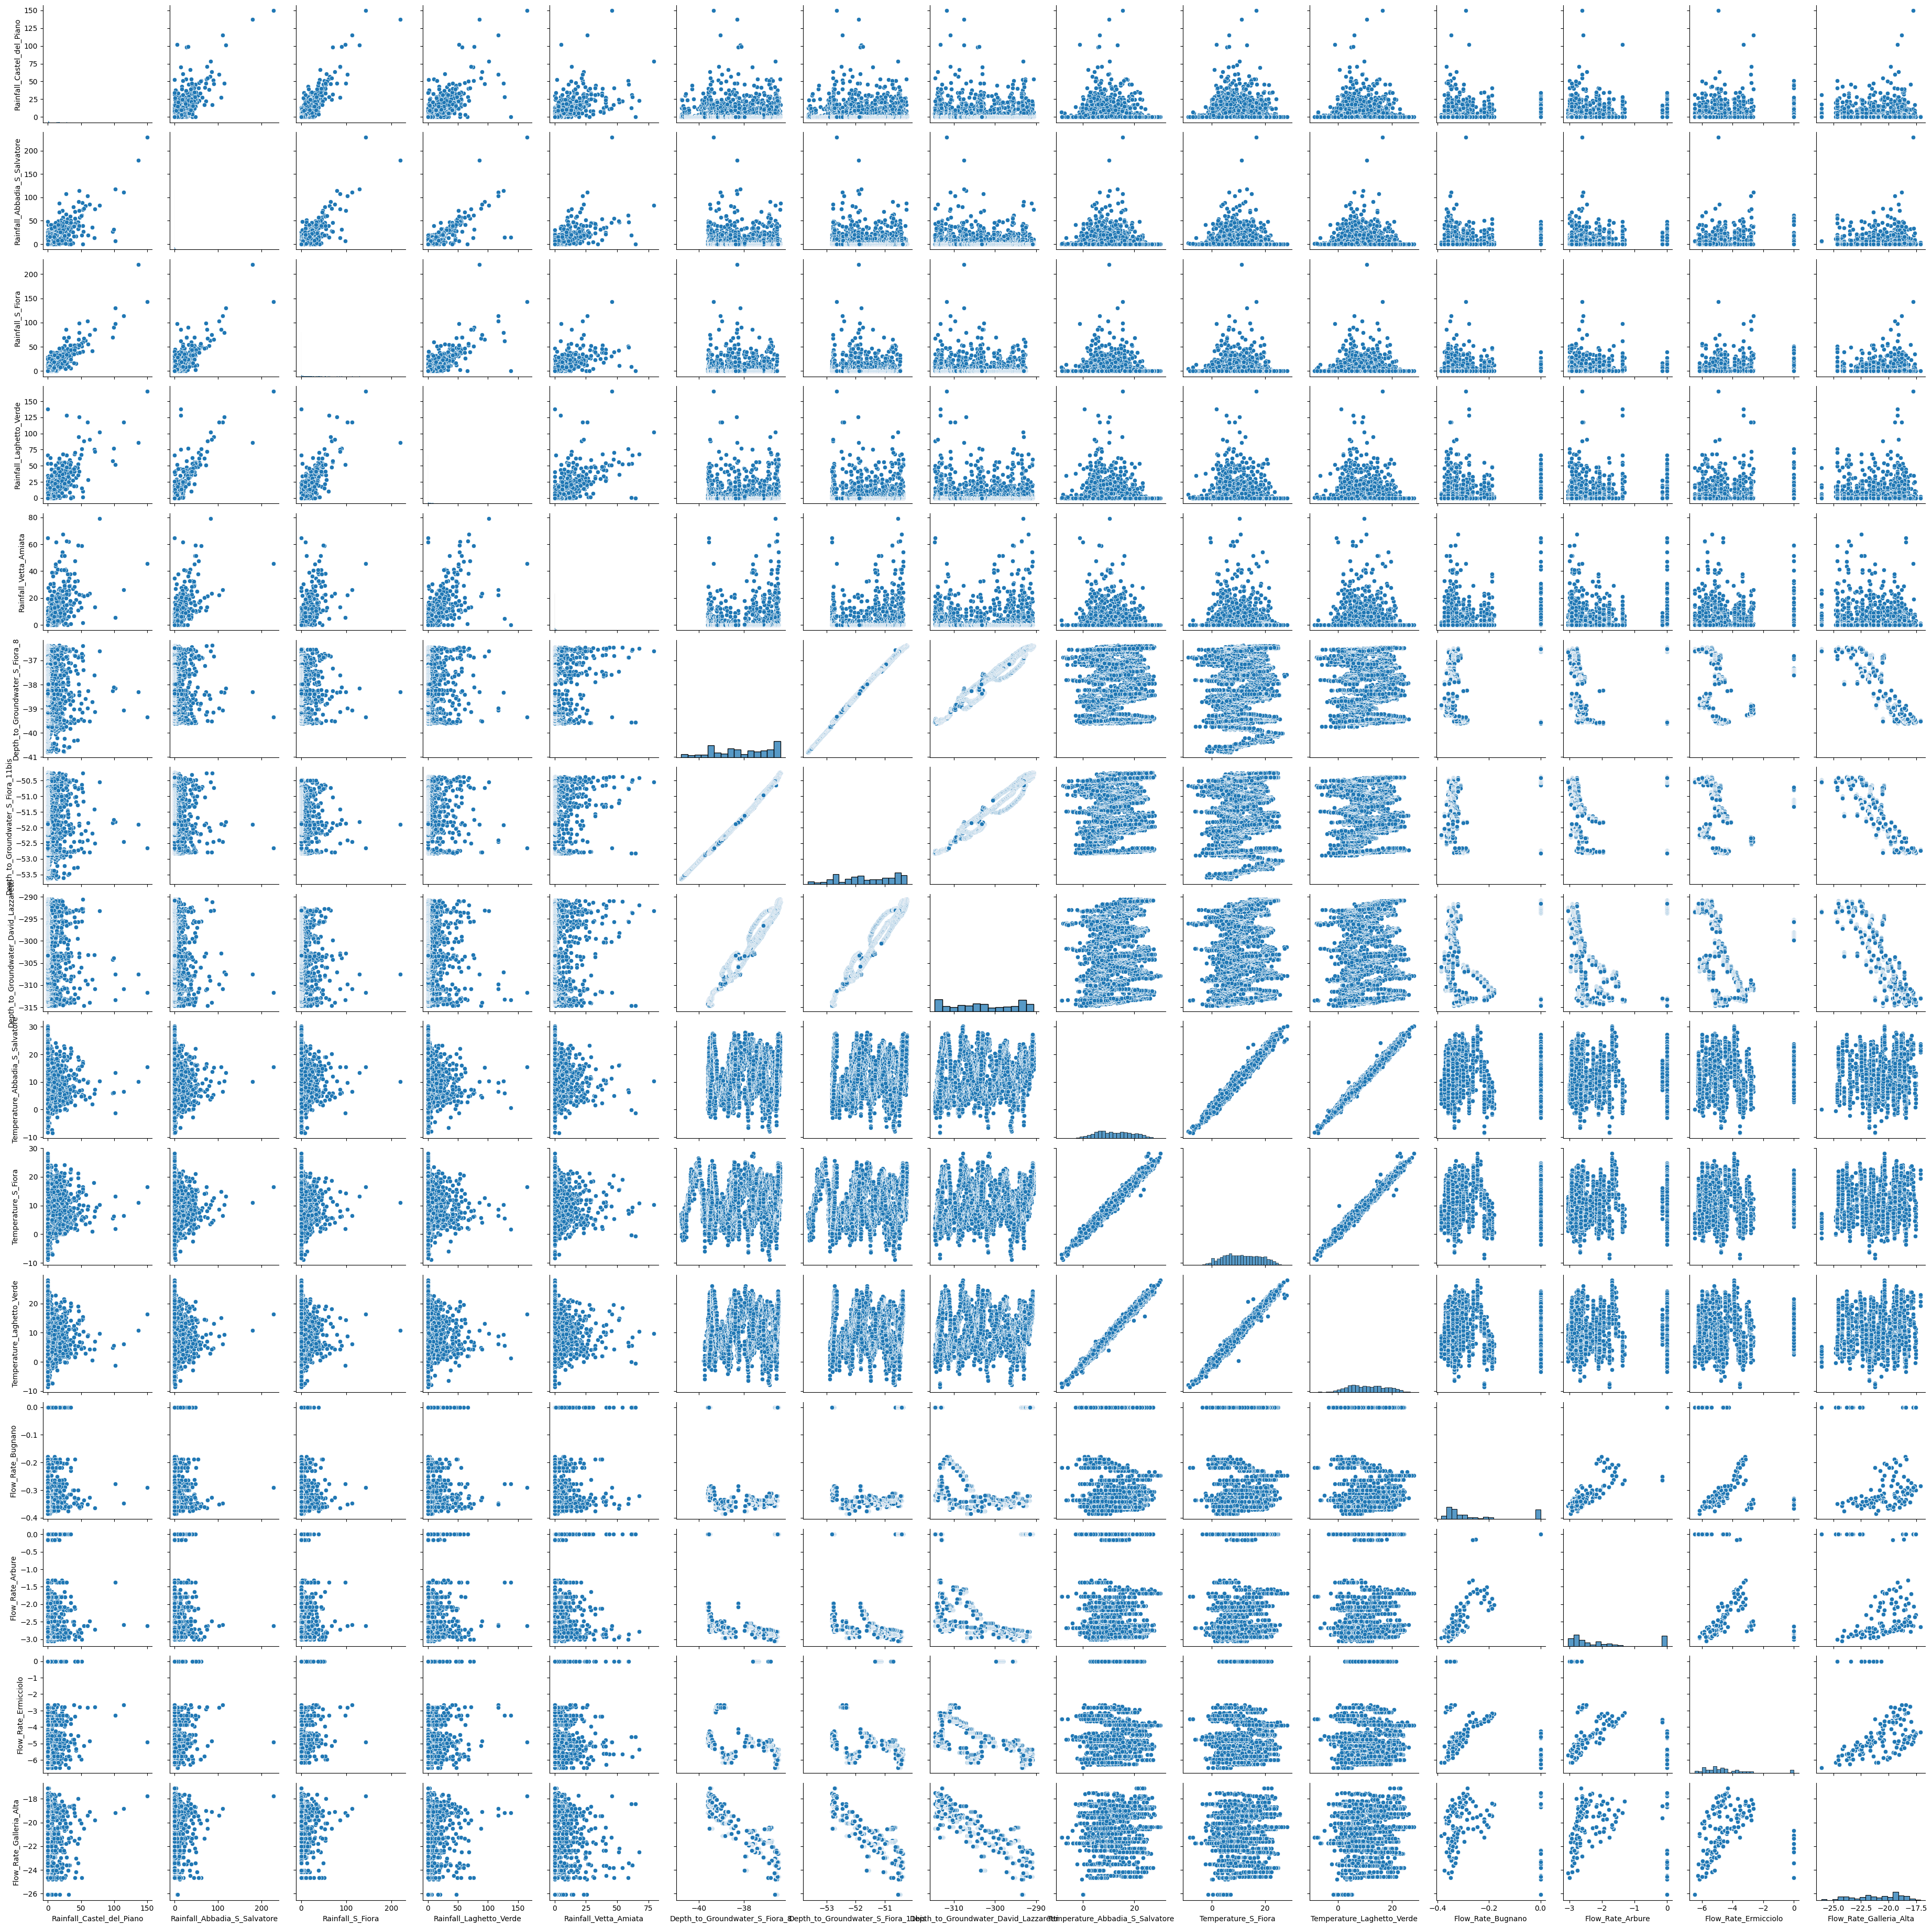

In [19]:
sns.pairplot(df_ws_a)

__Observaciones:__. 
Se puede observar que hay varias tendencias en los datos, se analizará de qué tipo son más adelante.

#### __Correlación:__

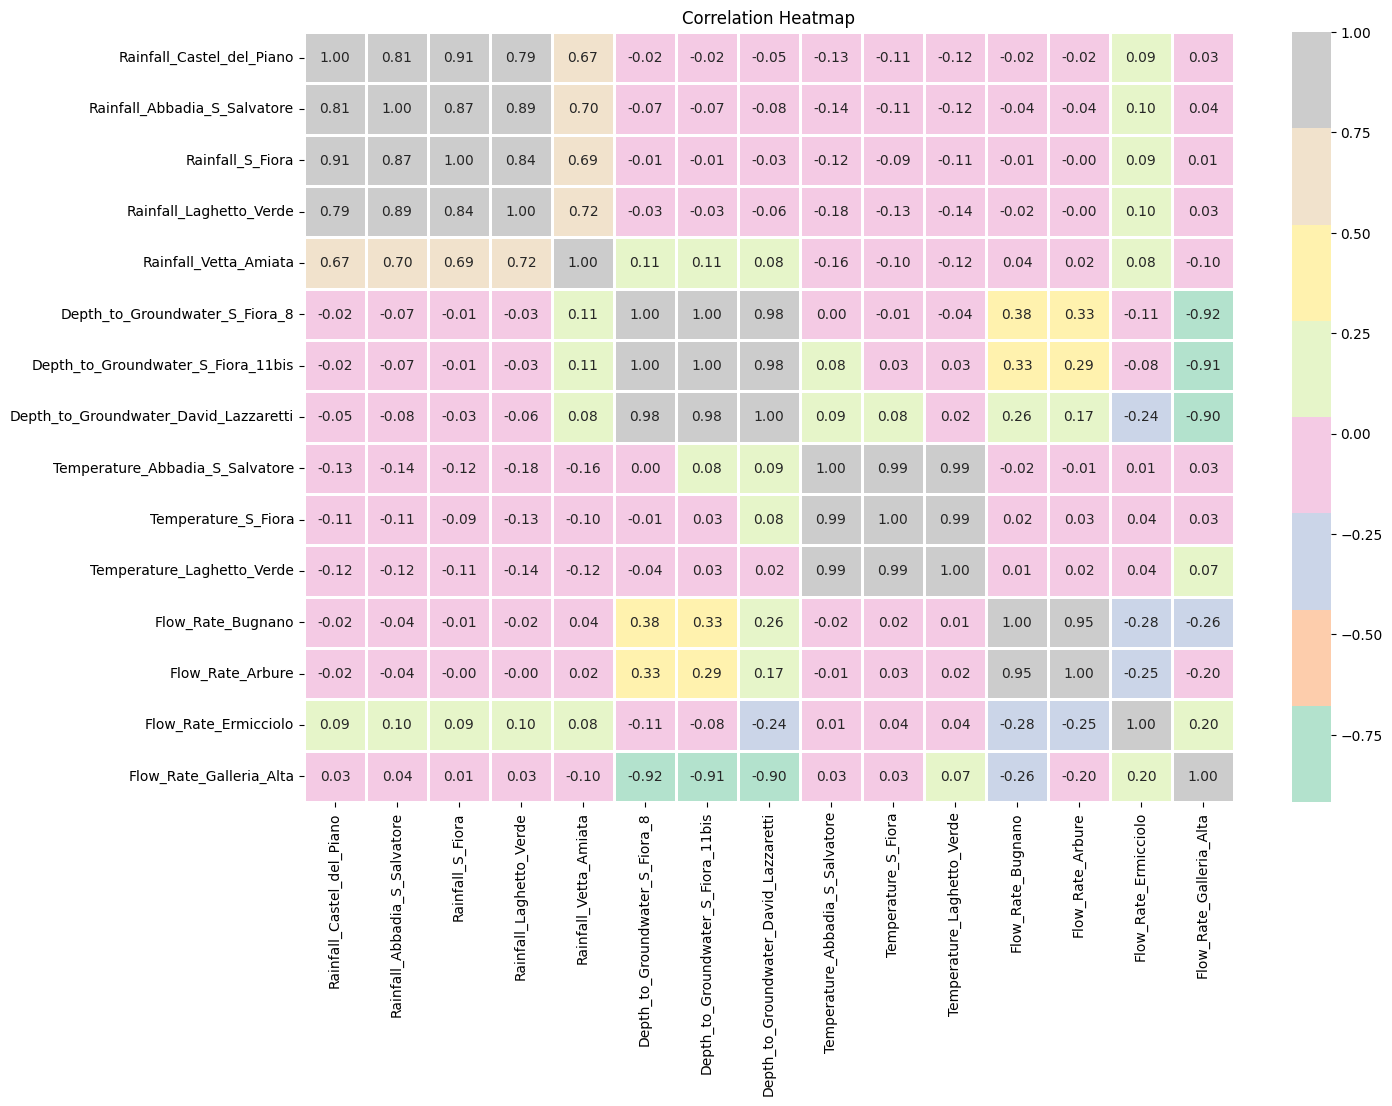

In [20]:
plt.figure(figsize=(15, 10))
df_wd_a = df_ws_a.drop(['Date'], axis=1)
sns.heatmap(df_wd_a.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

### __Water Spring Lupa__. 
---

#### __Análisis Univariable__

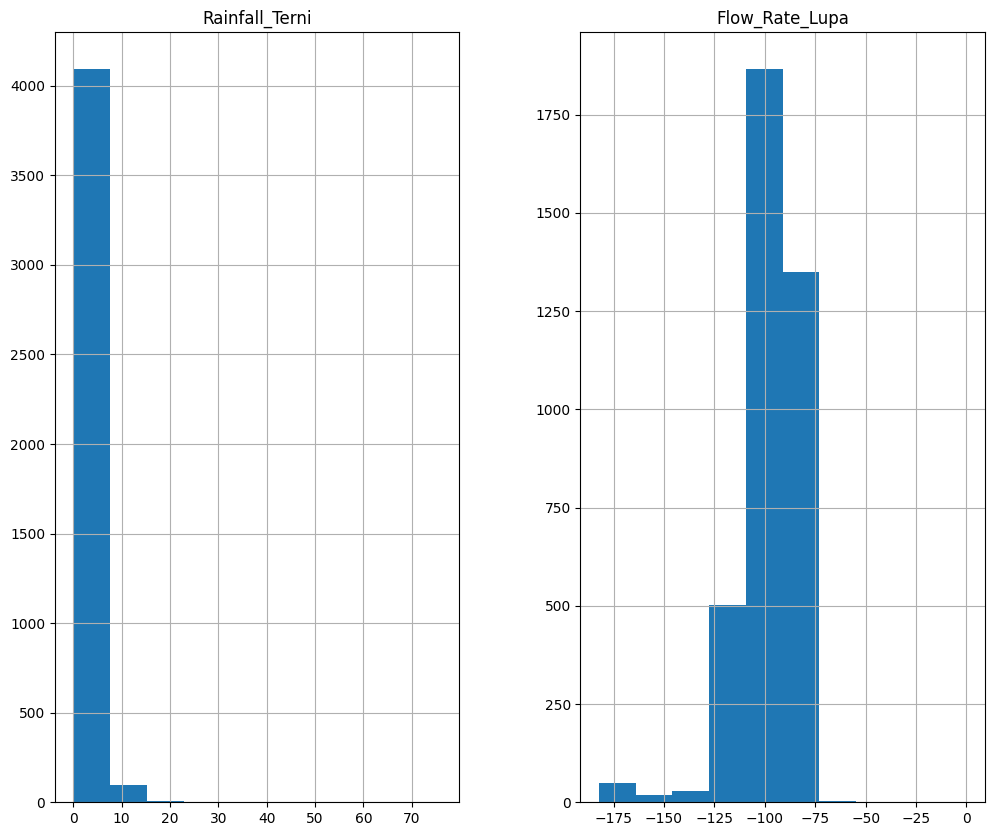

In [21]:
df_ws_l.hist(figsize=(12,10))
plt.show()

#### __Análisis Bivariado__

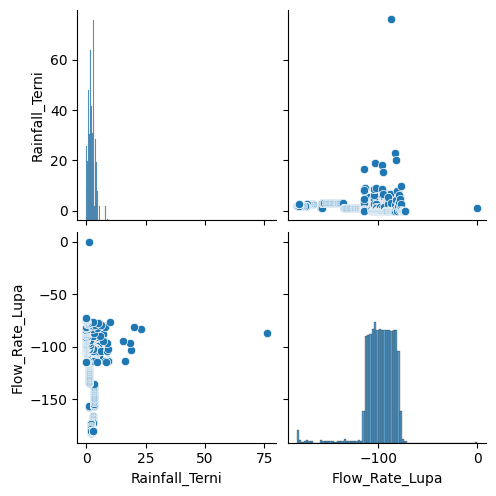

In [22]:
sns.pairplot(df_ws_l)

#### __Correlación__

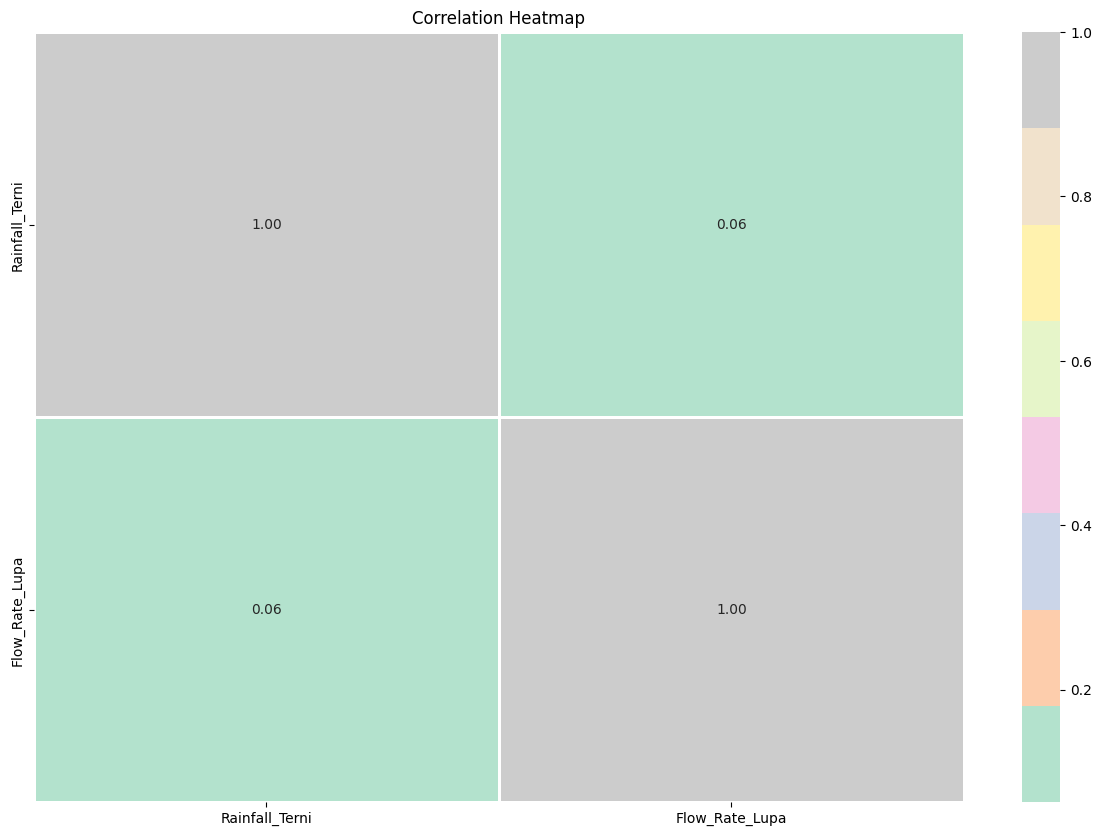

In [23]:
plt.figure(figsize=(15, 10))
df_wd_l = df_ws_l.drop(['Date'], axis=1)
sns.heatmap(df_wd_l.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

### __Water Spring Madonna di Canneto__. 
---

#### __Análisis Univariado__

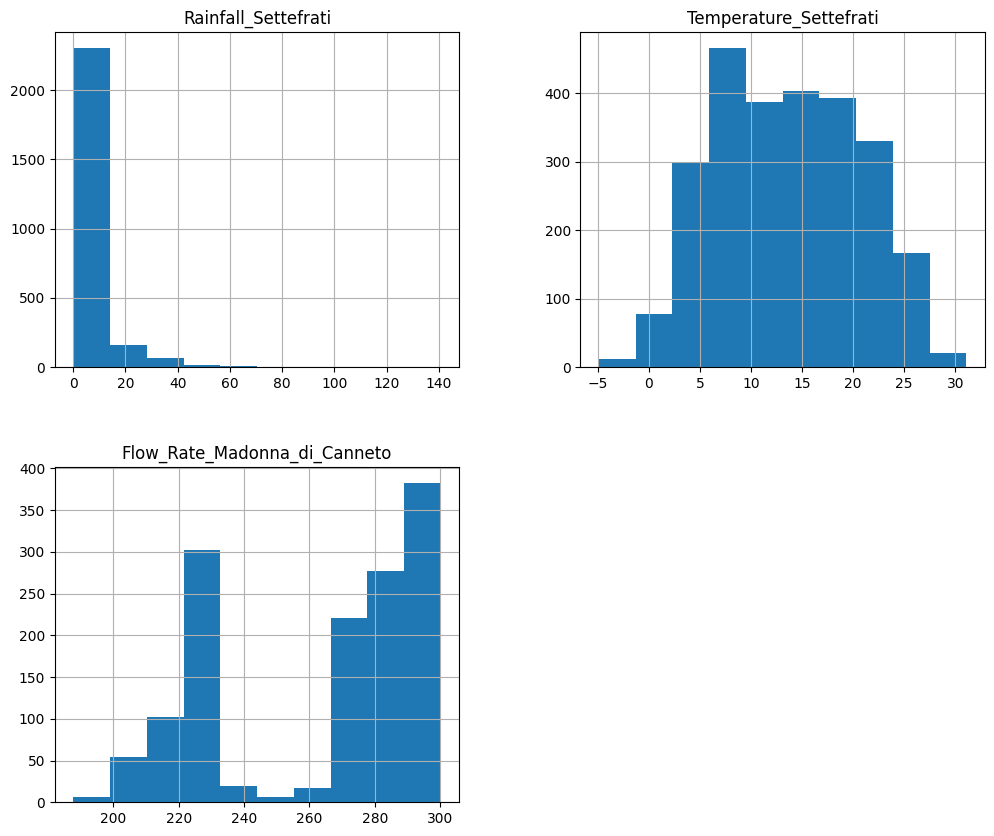

In [24]:
df_ws_m.hist(figsize=(12,10))
plt.show()

#### __Análisis Bivariado.__

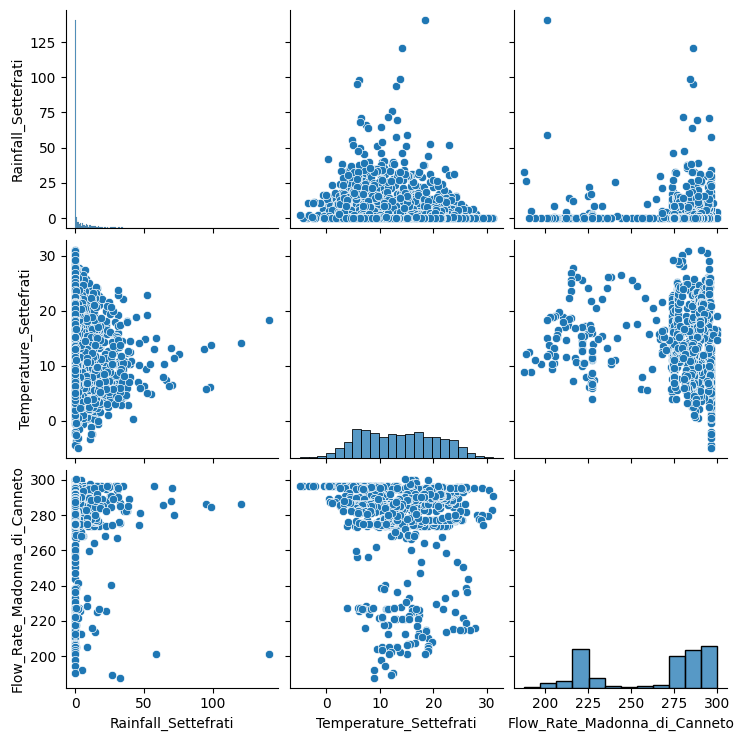

In [25]:
sns.pairplot(df_ws_m)

#### __Correlación.__

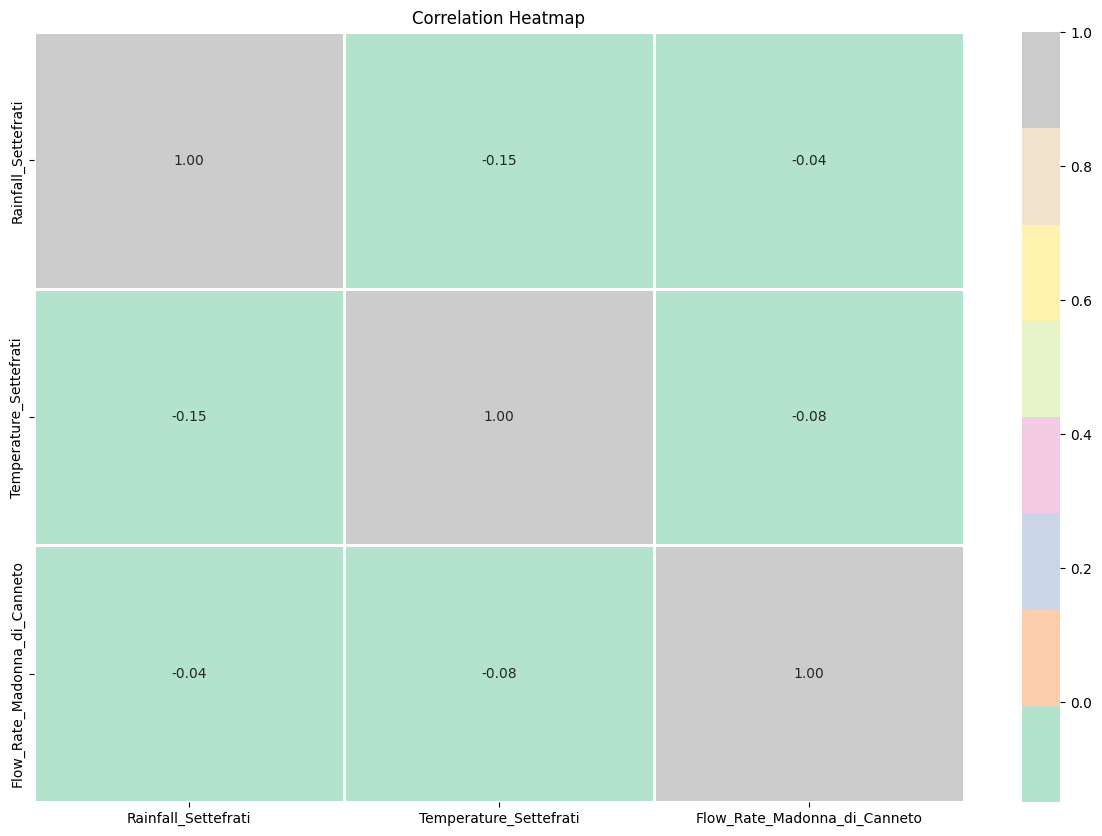

In [26]:
plt.figure(figsize=(15, 10))
df_wd_m = df_ws_m.drop(['Date'], axis=1)
sns.heatmap(df_wd_m.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

# 3. Limpieza de Datos (Data Cleansing). 

### Tratamiento de valores nulos. 

In [27]:
# Eliminación de valores nulos en DataFrames
def eliminated_nulls(df):
    fecha_actual = datetime.now()
    df.fillna(0, inplace=True)
    df['Date'].fillna(fecha_actual, inplace=True)

eliminated_nulls(df_ws_a)
eliminated_nulls(df_ws_l)
eliminated_nulls(df_ws_m)


/var/folders/z5/1t80mr5s6n10j0fkr7bb6x6c0000gn/T/ipykernel_56633/898751324.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(fecha_actual, inplace=True)


### Tratamiento de Outliers. 

Función para encontrar columnas con Outliers:


In [28]:
def outliers_column(df):
    columnas_con_outliers = []
    
    # Iterar sobre cada columna del DataFrame
    for col in df.columns:
        # Asegurarse de que la columna es numérica
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            
            # Definir los límites para los outliers
            limite_inferior = q1 - 1.5 * iqr
            limite_superior = q3 + 1.5 * iqr
            
            # Verificar si hay algún valor atípico en la columna
            outliers_presentes = ((df[col] < limite_inferior) | (df[col] > limite_superior)).any()
            
            # Si se encuentran outliers, agregar el nombre de la columna a la lista
            if outliers_presentes:
                columnas_con_outliers.append(col)
    
    return columnas_con_outliers

#### Outliers (Manantial Amiata). 

In [29]:
ws_a_oc = outliers_column(df_ws_a)
print(f"Columnas con outliers en df_aa: {ws_a_oc}")
df_ws_a_oc = df_ws_a[ws_a_oc]

Columnas con outliers en df_aa: ['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore', 'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata', 'Temperature_Abbadia_S_Salvatore', 'Temperature_Laghetto_Verde', 'Flow_Rate_Bugnano', 'Flow_Rate_Arbure']


Función para obtener gráfico de todos los outliers:

In [30]:
def plot_outliers_boxplots(df, columns):
    # 1. Contar el número de columnas con outliers
    num_cols = len(columns)

    # 2. Definir la disposición de los subplots (ej. 2 filas, 2 columnas)
    # Esto es flexible, puedes ajustarlo según tus necesidades
    num_filas = 4
    num_columnas = int(np.ceil(num_cols / num_filas))

    # 3. Crear la figura y los subplots
    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 10))

    # Aplanar el array de ejes para iterar fácilmente
    axes = axes.flatten()

    # 4. Iterar sobre las columnas y dibujar el box plot en cada subplot
    for i, col in enumerate(columns):
        ax = axes[i]
        ax.boxplot(df[col], vert=False) # vert=False para que sean horizontales
        ax.set_title(f'{col}')
        ax.set_xlabel('Valores')
        ax.grid(True, linestyle='--', alpha=0.6)

    # Ocultar los subplots que no se usen (si los hay)
    for i in range(num_cols, len(axes)):
        axes[i].axis('off')

    # Ajustar el espaciado entre subplots
    plt.tight_layout()
    plt.show()

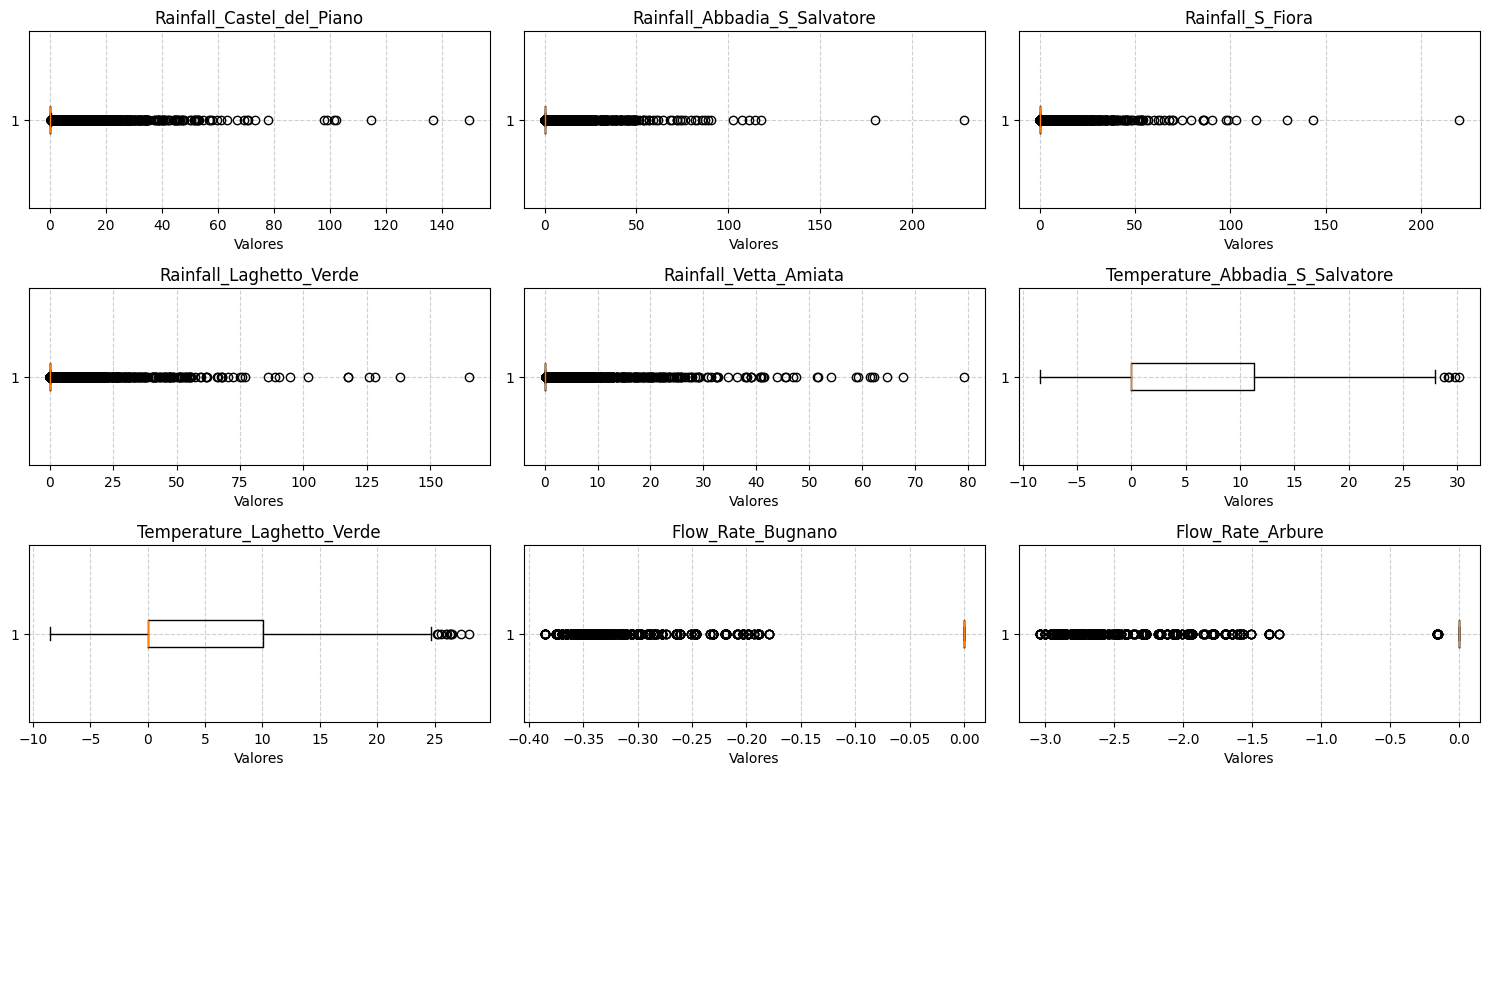

In [31]:
plot_outliers_boxplots(df_ws_a, ws_a_oc)

#### Outliers (Manantial Lupa).

In [32]:
ws_l_oc = outliers_column(df_ws_l)
print(f"Columnas con outliers en df_aa: {ws_l_oc}")
df_ws_l_oc = df_ws_l[ws_l_oc]

Columnas con outliers en df_aa: ['Rainfall_Terni', 'Flow_Rate_Lupa']


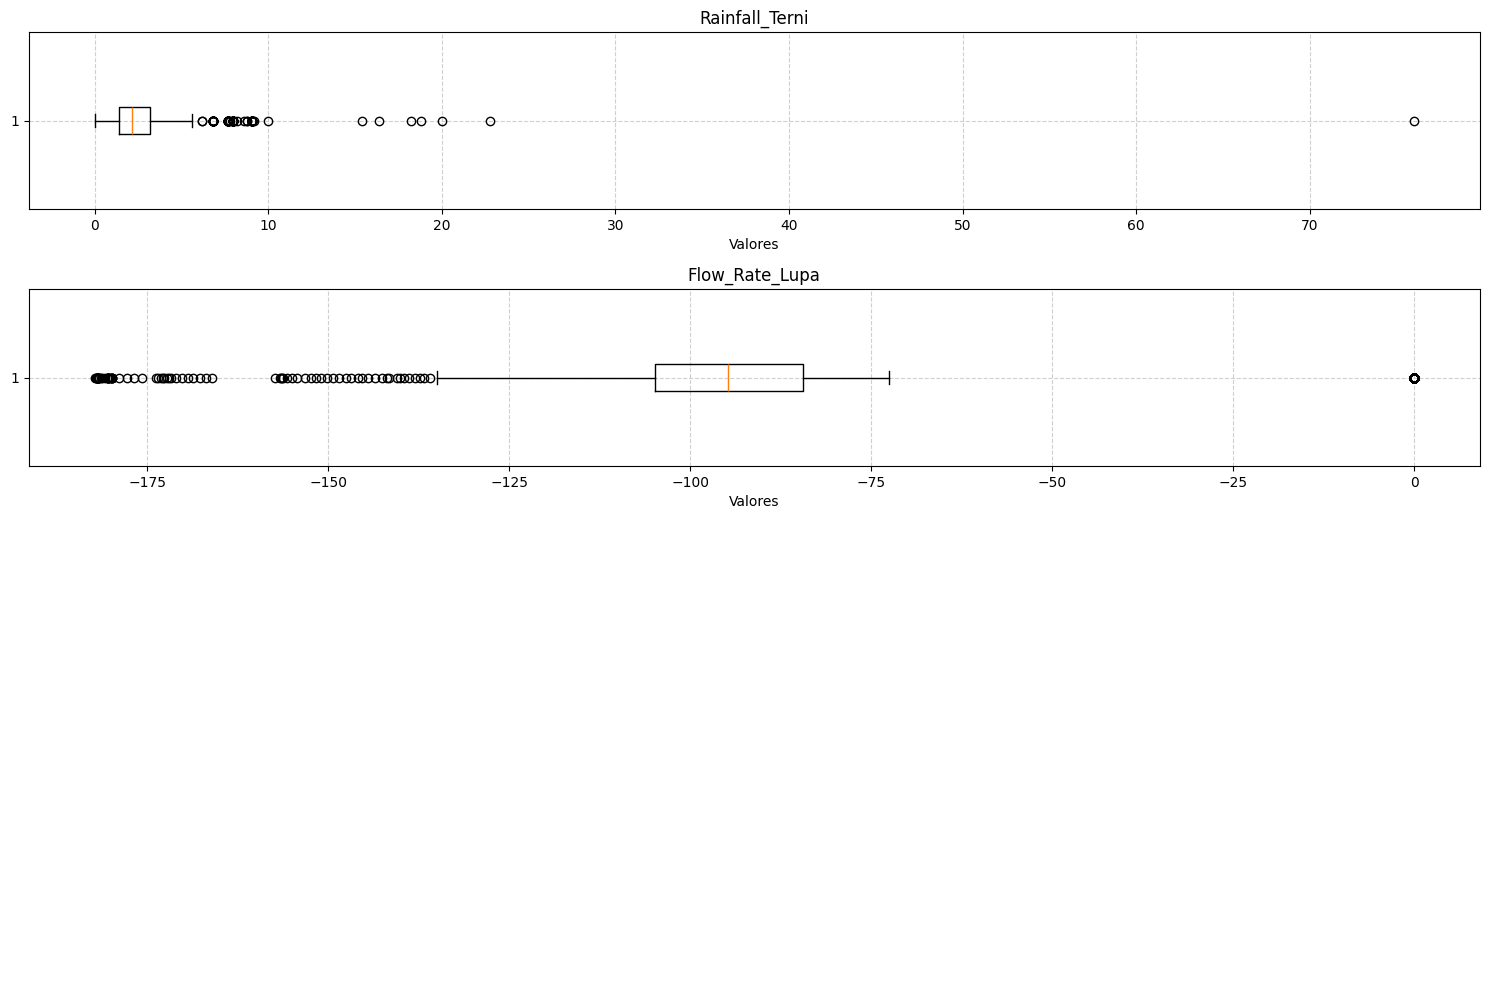

In [33]:
plot_outliers_boxplots(df_ws_l_oc, ws_l_oc)

#### Outliers (Manantial Madonna di Canneto).

In [34]:
ws_m_oc = outliers_column(df_ws_m)
print(f"Columnas con outliers en df_aa: {ws_m_oc}")
df_ws_m_oc = df_ws_m[ws_m_oc]

Columnas con outliers en df_aa: ['Rainfall_Settefrati']


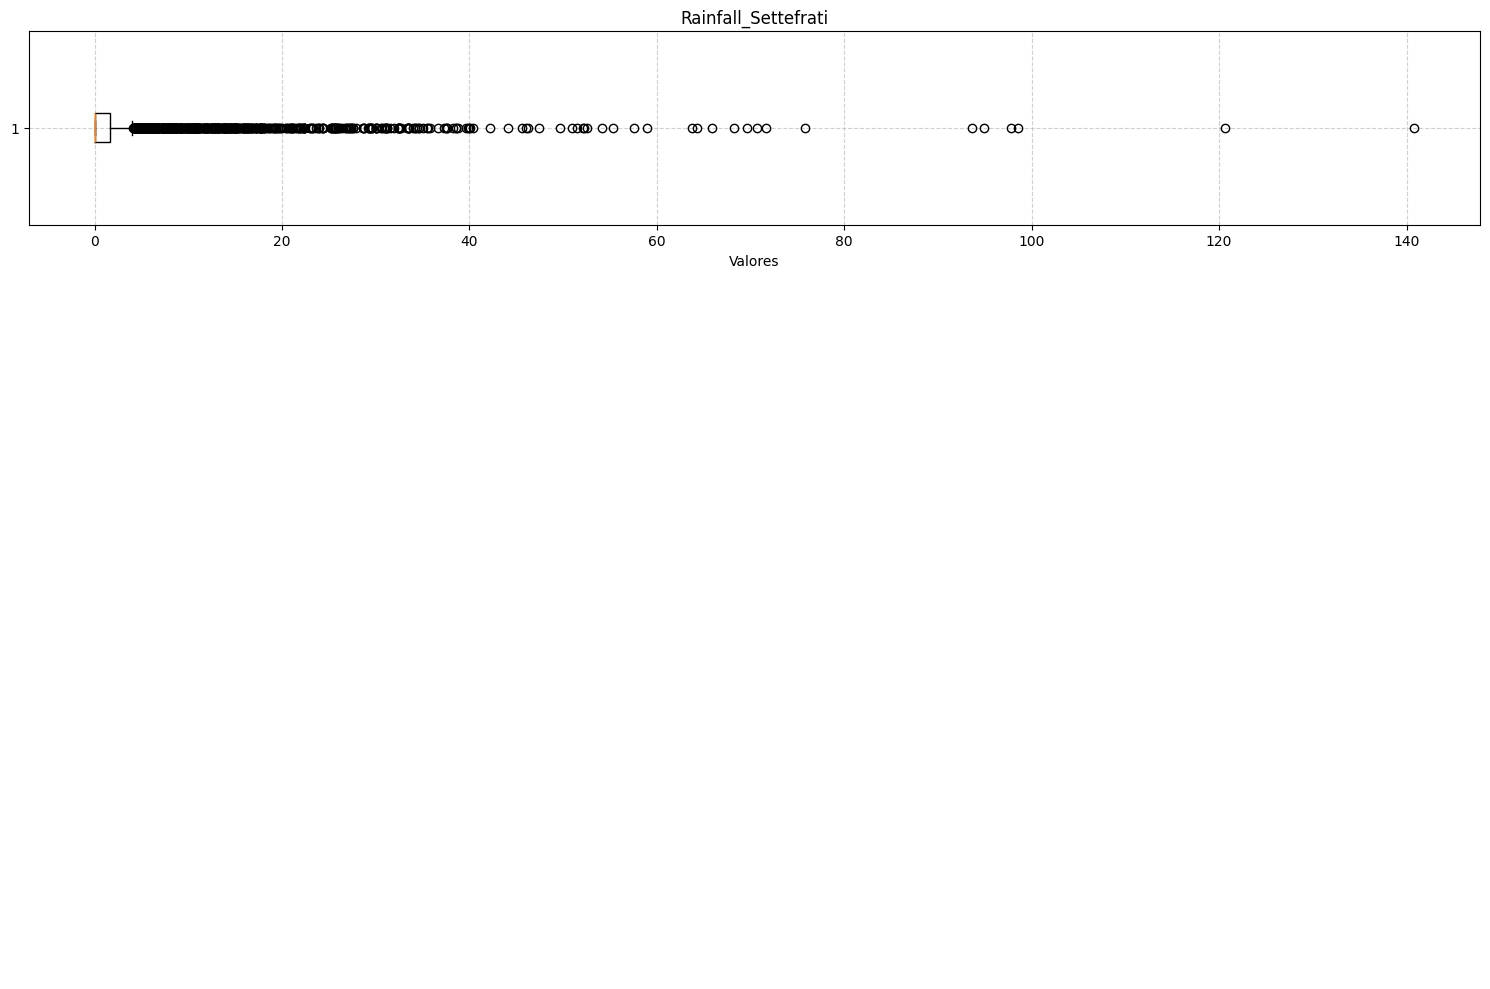

In [35]:
plot_outliers_boxplots(df_ws_m_oc, ws_m_oc)

### Cambio de tipo de datos (features). 

In [36]:
# Cambiar fecha de string a datetime
df_ws_a['Date'] = pd.to_datetime(df_ws_a['Date'], format='%d/%m/%Y')
df_ws_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   7487 non-null   datetime64[ns]
 1   Rainfall_Castel_del_Piano              7487 non-null   float64       
 2   Rainfall_Abbadia_S_Salvatore           7487 non-null   float64       
 3   Rainfall_S_Fiora                       7487 non-null   float64       
 4   Rainfall_Laghetto_Verde                7487 non-null   float64       
 5   Rainfall_Vetta_Amiata                  7487 non-null   float64       
 6   Depth_to_Groundwater_S_Fiora_8         7487 non-null   float64       
 7   Depth_to_Groundwater_S_Fiora_11bis     7487 non-null   float64       
 8   Depth_to_Groundwater_David_Lazzaretti  7487 non-null   float64       
 9   Temperature_Abbadia_S_Salvatore        7487 non-null   float64 

In [37]:
# Cambiar fecha de string a datetime
df_ws_l['Date'] = pd.to_datetime(df_ws_l['Date'], format='%d/%m/%Y')
df_ws_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4199 non-null   datetime64[ns]
 1   Rainfall_Terni  4199 non-null   float64       
 2   Flow_Rate_Lupa  4199 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 98.5 KB


In [40]:
df_ws_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          3113 non-null   object 
 1   Rainfall_Settefrati           3113 non-null   float64
 2   Temperature_Settefrati        3113 non-null   float64
 3   Flow_Rate_Madonna_di_Canneto  3113 non-null   float64
dtypes: float64(3), object(1)
memory usage: 97.4+ KB


In [41]:
df_ws_m['Date'] = pd.to_datetime(df_ws_m['Date'], format='%d/%m/%Y')
df_ws_m.info()

ValueError: time data "0" doesn't match format "%d/%m/%Y", at position 3104. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

# 4. Ingeniería de Características (Feature Engineering). 

### __Comparación de features entre acuíferos.__. 
En la siguiente tabla, se pueden observar las features en común para todos los acuíferos.

| Nombre de Acuífero | Features                                                            | Features en común                       |
|--------------------|---------------------------------------------------------------------|-----------------------------------------|
| Water Spring Amiata| -Date<br>-Rainfall<br>-Groundwater<br>-Temperature<br>-Flow_Rate    | Date, Rainfall, Flow_Rate               |
| Water Spring Lupa  | -Date<br>-Rainfall<br>-Flow_Rate                                    | Date, Rainfall, Flow_Rate               |
| Water Spring Madonna di Canneto | -Date<br>-Rainfall<br>-Temperature<br>-Flow_Rate       | Date, Rainfall, Flow_Rate               |

Como se puede observar en la tabla, se identificaron las variables que se repiten en cada uno de los manantiales.  
Entre las variables en común, se usará el Flow_Rate, ya que, el flow rate (tasa de flujo) es un indicador directo de lo que sucede en este tipo de cuerpo de agua, su aumento o disminución nos proporciona un panorama completo de su estado.

## Transformación de formato (Wide -> Long). 

Al realizar el EDA inicial, se identificó que existen variables (features) que representan el mismo valor, pero diferente ubicación, por ejemplo, la variable __Rainfall__ esta repetida varias veces en varias ubicaciones, es por esto que se decidirá cambiar el formato del Dataframe, con el fin de obtener una sola variable, esto también ayudará a que nuestra variable target __Volume__ sea correctamente tratada.

Función general para realizar transformación de formato Wide -> Long.

In [42]:
# Transformación de formato (Wide -> Long)
def transform_wide_to_long(df, match):
    column_names_list = df.columns.tolist()
    cols_without_rainfall = [i for i in column_names_list if not i.startswith(match)]
    df_filtrado = df.filter(like=match)
    column_names_list_fil = df_filtrado.columns.tolist()
    df_long = df.melt(
                    id_vars= cols_without_rainfall,
                    value_vars= column_names_list_fil,
                    var_name= match + 'Ubication',
                    value_name= match + 'Value'
                )

    df_long.head() 
    return df_long

#### Manantial Amiata. 

In [45]:
df_lswa_r = transform_wide_to_long(df_ws_a, "Rainfall_")
df_lswa_g = transform_wide_to_long(df_lswa_r, "Depth_to_Groundwater_")
df_lswa_t = transform_wide_to_long(df_lswa_g, "Temperature_")
df_lswa_f = transform_wide_to_long(df_lswa_t, "Flow_Rate_")
df_ws_a = df_lswa_f
df_ws_a.head()

Date         Rainfall_Ubication  Rainfall_Value  \
0 2000-01-01  Rainfall_Castel_del_Piano             0.0   
1 2000-01-02  Rainfall_Castel_del_Piano             0.0   
2 2000-01-03  Rainfall_Castel_del_Piano             0.0   
3 2000-01-04  Rainfall_Castel_del_Piano             0.0   
4 2000-01-05  Rainfall_Castel_del_Piano             0.0   

   Depth_to_Groundwater_Ubication  Depth_to_Groundwater_Value  \
0  Depth_to_Groundwater_S_Fiora_8                         0.0   
1  Depth_to_Groundwater_S_Fiora_8                         0.0   
2  Depth_to_Groundwater_S_Fiora_8                         0.0   
3  Depth_to_Groundwater_S_Fiora_8                         0.0   
4  Depth_to_Groundwater_S_Fiora_8                         0.0   

             Temperature_Ubication  Temperature_Value Flow_Rate_Ubication  \
0  Temperature_Abbadia_S_Salvatore                0.0   Flow_Rate_Bugnano   
1  Temperature_Abbadia_S_Salvatore                0.0   Flow_Rate_Bugnano   
2  Temperature_Abbadia_S_Salvatore                0.0   Flow_Rate_Bugnano   
3  Temperature_Abbadia_S_Salvatore                0.0   Flow_Rate_Bugnano   
4  Temperature_Abbadia_S_Salvatore                0.0   Flow_Rate_Bugnano   

   Flow_Rate_Value  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [46]:
df_ws_a['Rainfall_Ubication'].unique()

array(['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde',
       'Rainfall_Vetta_Amiata'], dtype=object)

#### Manantial Lupa. 

En el caso del Manantial Lupa no es necesario realizar una transformación de formato wide -> long, debido a que solo hay una sola ubicación para Rainfall y Flow_Rate.

#### Manantial Madonna di Canneto. 

Al igual que el Manantial Lupa, no es necesario realizar alguna transformación, debido a que solo se tiene una sola ubicación para Rainfall, Temperature y Flow Rate.

### Variables categóricas a variables numéricas.

Ahora que se transformaron las columnas de los dataset, se convertirán las variables categóricas a variables numéricas, con el fin de facilitar el análisis.

In [48]:
def transform_ubications_to_numbers(df, column_name):
    """
    Mapea las ubicaciones de lluvia a números únicos.
    
    Args:
        df (DataFrame): DataFrame que contiene la columna de ubicaciones de lluvia.
        column_name (str): Nombre de la columna que contiene las ubicaciones de lluvia.
    
    Returns:
        DataFrame: DataFrame con la columna de ubicaciones mapeada a números.
    """
    all_ubications = df[column_name].unique()
    ubications_map = {}
    num = 1
    
    for ubication in all_ubications:
        ubications_map[ubication] = num
        num += 1

    print(f"Ubicaciones de lluvia mapeadas: {ubications_map}")

    # Mapeo de ubicaciones de lluvia a números
    df[column_name] = df[column_name].map(ubications_map)
    
    return df

In [49]:
# Aplicar la transformación a df_aa
df_ws_a = transform_ubications_to_numbers(df_ws_a, 'Rainfall_Ubication')
df_ws_a = transform_ubications_to_numbers(df_ws_a, 'Depth_to_Groundwater_Ubication')
df_ws_a = transform_ubications_to_numbers(df_ws_a, 'Temperature_Ubication')
df_ws_a = transform_ubications_to_numbers(df_ws_a, 'Flow_Rate_Ubication')
df_ws_a.head()

Ubicaciones de lluvia mapeadas: {'Rainfall_Castel_del_Piano': 1, 'Rainfall_Abbadia_S_Salvatore': 2, 'Rainfall_S_Fiora': 3, 'Rainfall_Laghetto_Verde': 4, 'Rainfall_Vetta_Amiata': 5}
Ubicaciones de lluvia mapeadas: {'Depth_to_Groundwater_S_Fiora_8': 1, 'Depth_to_Groundwater_S_Fiora_11bis': 2, 'Depth_to_Groundwater_David_Lazzaretti': 3}
Ubicaciones de lluvia mapeadas: {'Temperature_Abbadia_S_Salvatore': 1, 'Temperature_S_Fiora': 2, 'Temperature_Laghetto_Verde': 3}
Ubicaciones de lluvia mapeadas: {'Flow_Rate_Bugnano': 1, 'Flow_Rate_Arbure': 2, 'Flow_Rate_Ermicciolo': 3, 'Flow_Rate_Galleria_Alta': 4}


Date  Rainfall_Ubication  Rainfall_Value  \
0 2000-01-01                   1             0.0   
1 2000-01-02                   1             0.0   
2 2000-01-03                   1             0.0   
3 2000-01-04                   1             0.0   
4 2000-01-05                   1             0.0   

   Depth_to_Groundwater_Ubication  Depth_to_Groundwater_Value  \
0                               1                         0.0   
1                               1                         0.0   
2                               1                         0.0   
3                               1                         0.0   
4                               1                         0.0   

   Temperature_Ubication  Temperature_Value  Flow_Rate_Ubication  \
0                      1                0.0                    1   
1                      1                0.0                    1   
2                      1                0.0                    1   
3                      1                0.0                    1   
4                      1                0.0                    1   

   Flow_Rate_Value  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

### Encontrar variables que se volvieron constantes.

Con el fin de identificar variables que se volvieron constantes, se buscarán aquellas variables cuya desviación estándar sea 0.

In [50]:
df_ws_a.describe()

Date  Rainfall_Ubication  Rainfall_Value  \
count              1347660        1.347660e+06    1.347660e+06   
mean   2010-04-01 00:00:00        3.000000e+00    1.592590e+00   
min    2000-01-01 00:00:00        1.000000e+00    0.000000e+00   
25%    2005-02-14 00:00:00        2.000000e+00    0.000000e+00   
50%    2010-04-01 00:00:00        3.000000e+00    0.000000e+00   
75%    2015-05-17 00:00:00        4.000000e+00    0.000000e+00   
max    2020-06-30 00:00:00        5.000000e+00    2.285000e+02   
std                    NaN        1.414214e+00    7.118033e+00   

       Depth_to_Groundwater_Ubication  Depth_to_Groundwater_Value  \
count                    1.347660e+06                1.347660e+06   
mean                     2.000000e+00               -5.801166e+01   
min                      1.000000e+00               -3.147100e+02   
25%                      1.000000e+00               -5.101000e+01   
50%                      2.000000e+00                0.000000e+00   
75%                      3.000000e+00                0.000000e+00   
max                      3.000000e+00                0.000000e+00   
std                      8.164969e-01                1.025977e+02   

       Temperature_Ubication  Temperature_Value  Flow_Rate_Ubication  \
count           1.347660e+06       1.347660e+06         1.347660e+06   
mean            2.000000e+00       7.420353e+00         2.500000e+00   
min             1.000000e+00      -8.950000e+00         1.000000e+00   
25%             1.000000e+00       0.000000e+00         1.750000e+00   
50%             2.000000e+00       5.700000e+00         2.500000e+00   
75%             3.000000e+00       1.375000e+01         3.250000e+00   
max             3.000000e+00       3.015000e+01         4.000000e+00   
std             8.164969e-01       7.752693e+00         1.118034e+00   

       Flow_Rate_Value  
count     1.347660e+06  
mean     -1.860509e+00  
min      -2.608955e+01  
25%       0.000000e+00  
50%       0.000000e+00  
75%       0.000000e+00  
max       0.000000e+00  
std       5.307079e+00

In [51]:
df_ws_l.describe()

Date  Rainfall_Terni  Flow_Rate_Lupa
count                 4199     4199.000000     4199.000000
mean   2014-10-01 00:00:00        2.466355      -88.823577
min    2009-01-01 00:00:00        0.000000     -182.310000
25%    2011-11-16 12:00:00        1.402000     -104.820000
50%    2014-10-01 00:00:00        2.142000      -94.740000
75%    2017-08-15 12:00:00        3.165000      -84.385000
max    2020-06-30 00:00:00       76.000000        0.000000
std                    NaN        2.041837       31.543860

In [52]:
df_ws_m.describe()

Rainfall_Settefrati  Temperature_Settefrati  \
count          3113.000000             3113.000000   
mean              3.492933               11.139528   
std               9.424330                8.171328   
min               0.000000               -4.900000   
25%               0.000000                4.550000   
50%               0.000000               10.850000   
75%               1.600000               17.750000   
max             140.800000               31.100000   

       Flow_Rate_Madonna_di_Canneto  
count                   3113.000000  
mean                     117.251388  
std                      132.558302  
min                        0.000000  
25%                        0.000000  
50%                        0.000000  
75%                      275.014901  
max                      300.160983

No hay valores estándar igual a 0, por lo que se continuará con el refinamiento del EDA refinado.

# 5. EDA refinado y visualización. 

### Manantial Amiata. 

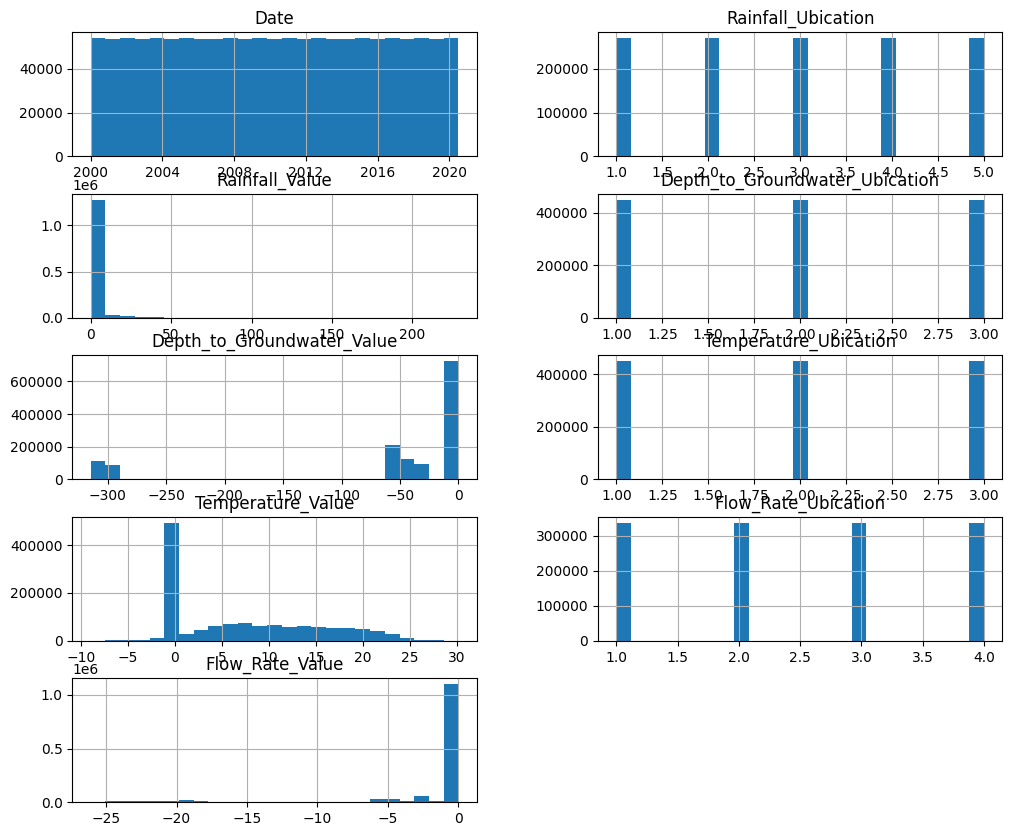

In [53]:
# Análisis Univariado de Acuífero Auser
df_ws_a.hist(figsize=(12,10), layout=(5, 2), bins=25)
plt.show()

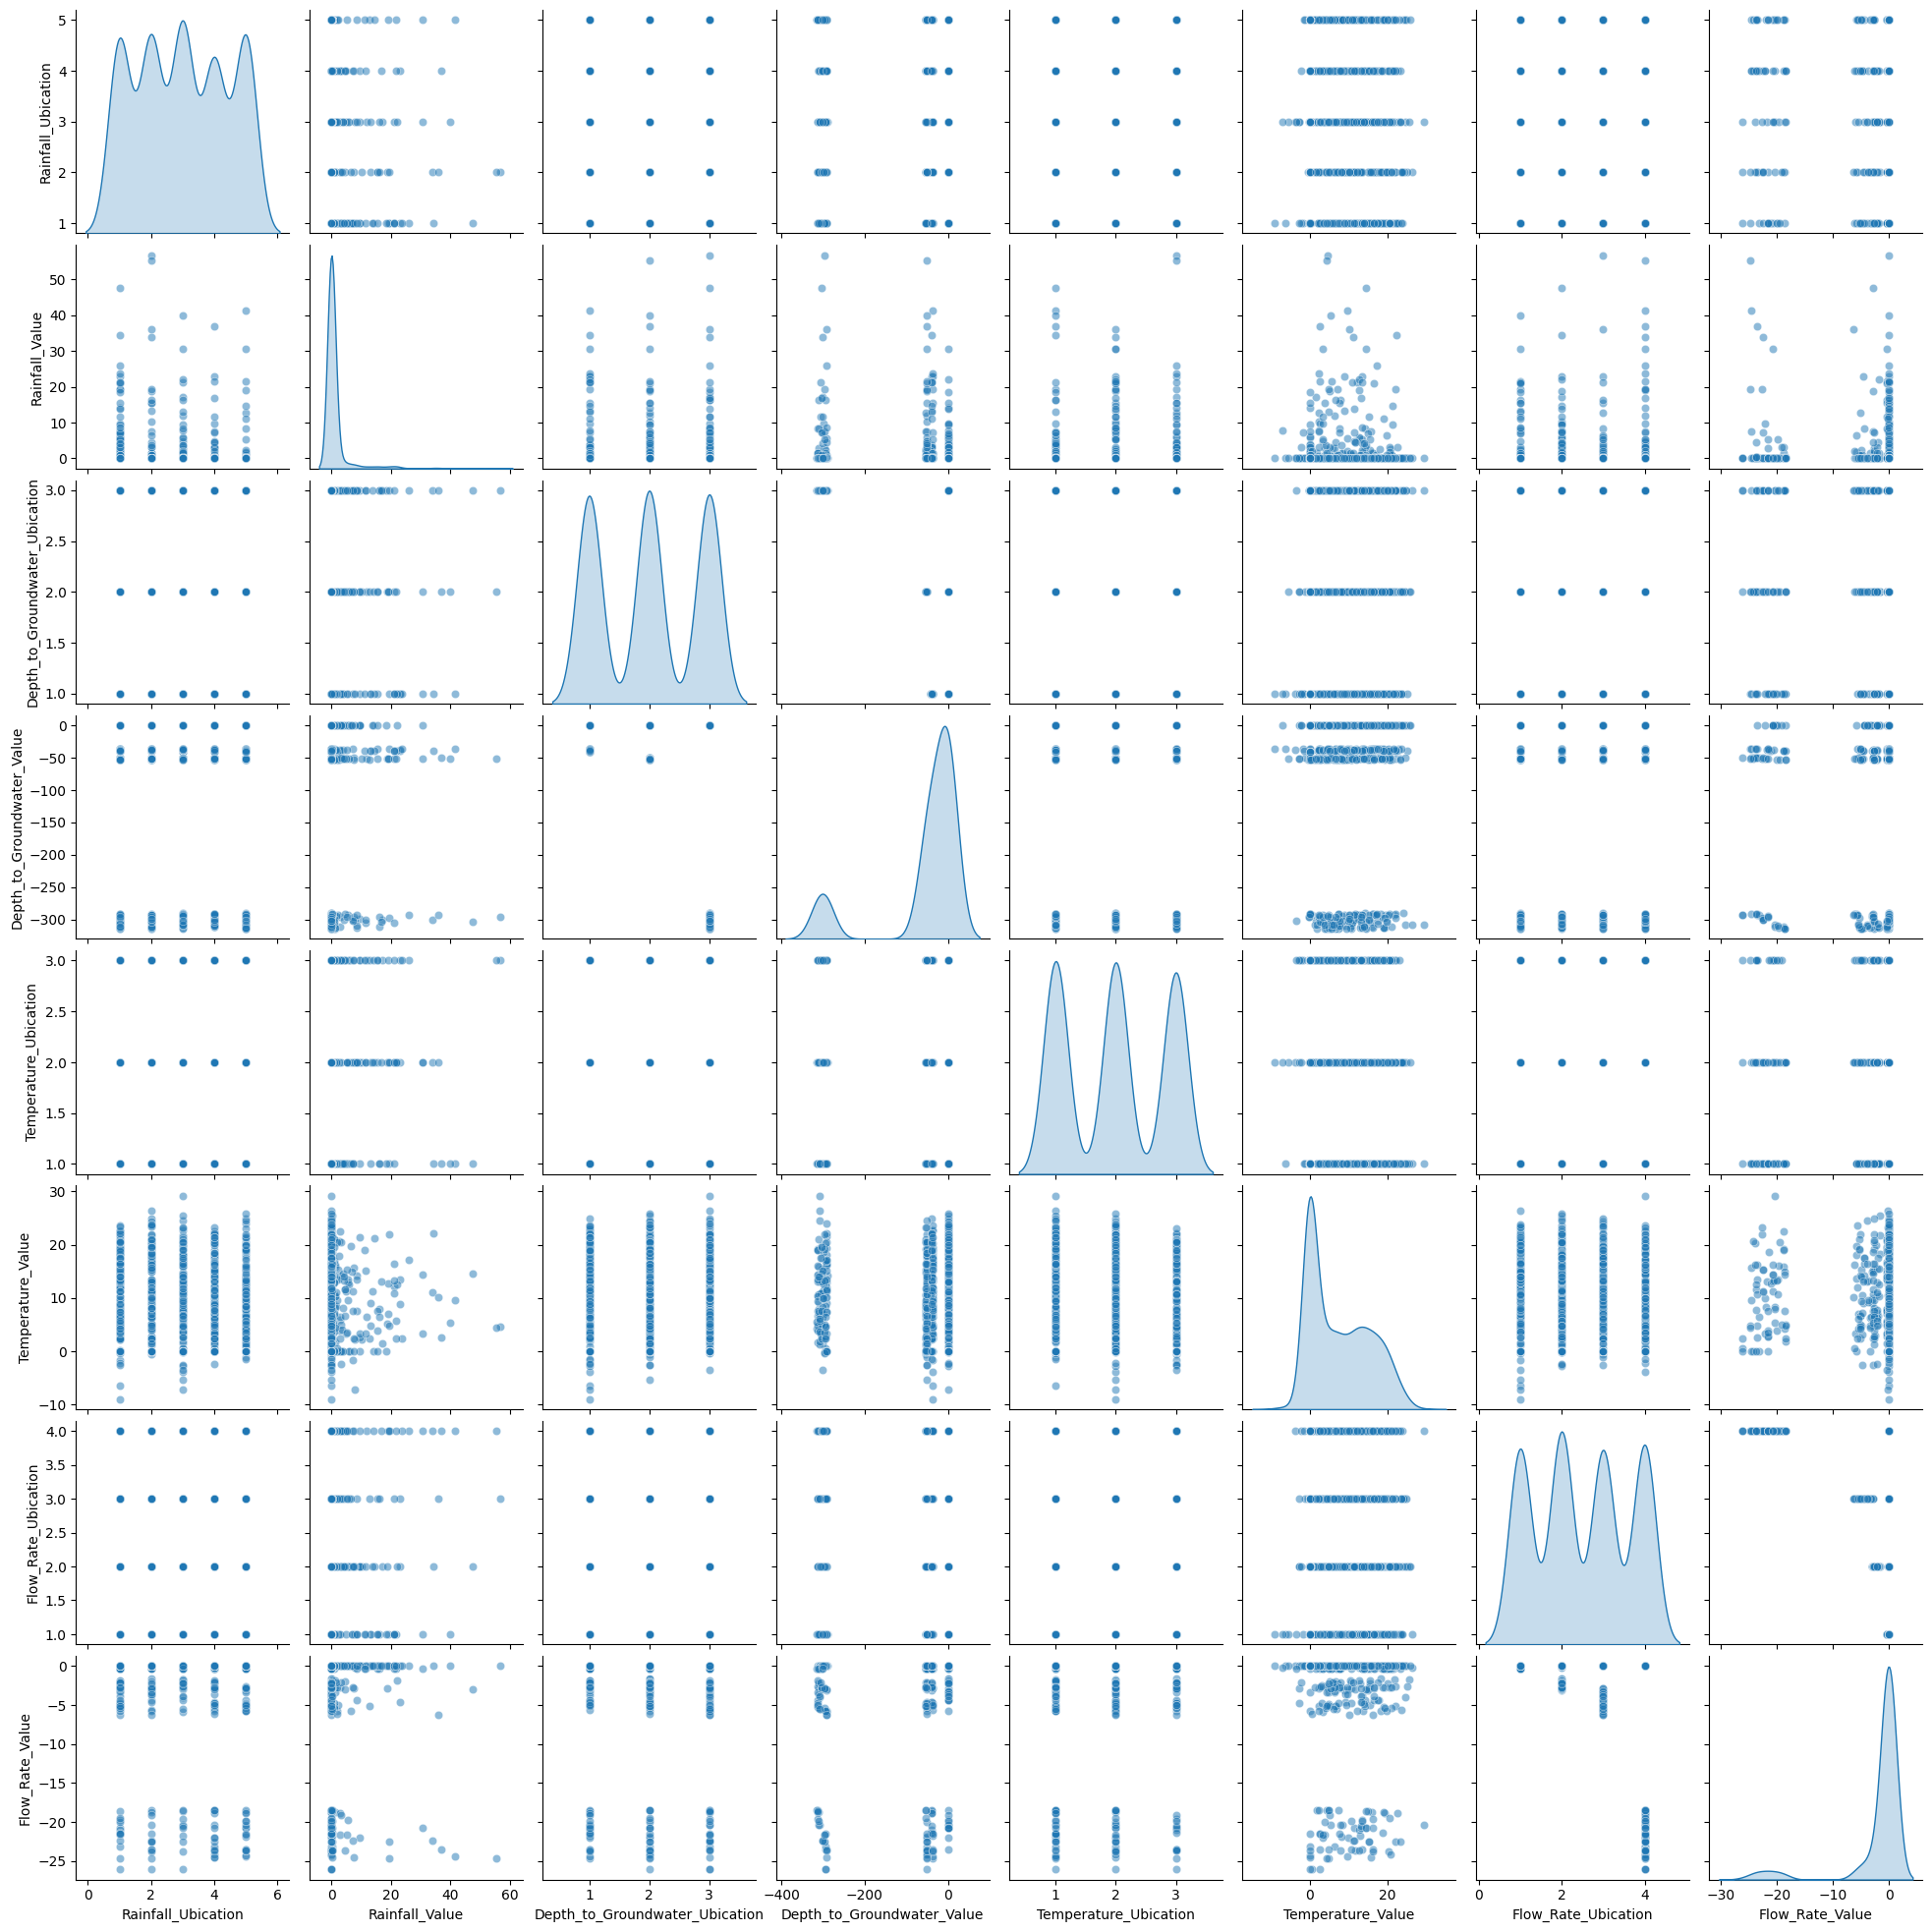

In [54]:
# Análisis Univariado de Acuífero Auser
df_sample_ws_a = df_ws_a.sample(n=1000) # O .sample(frac=0.01) para el 1% de los datos
sns.pairplot(df_sample_ws_a, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})

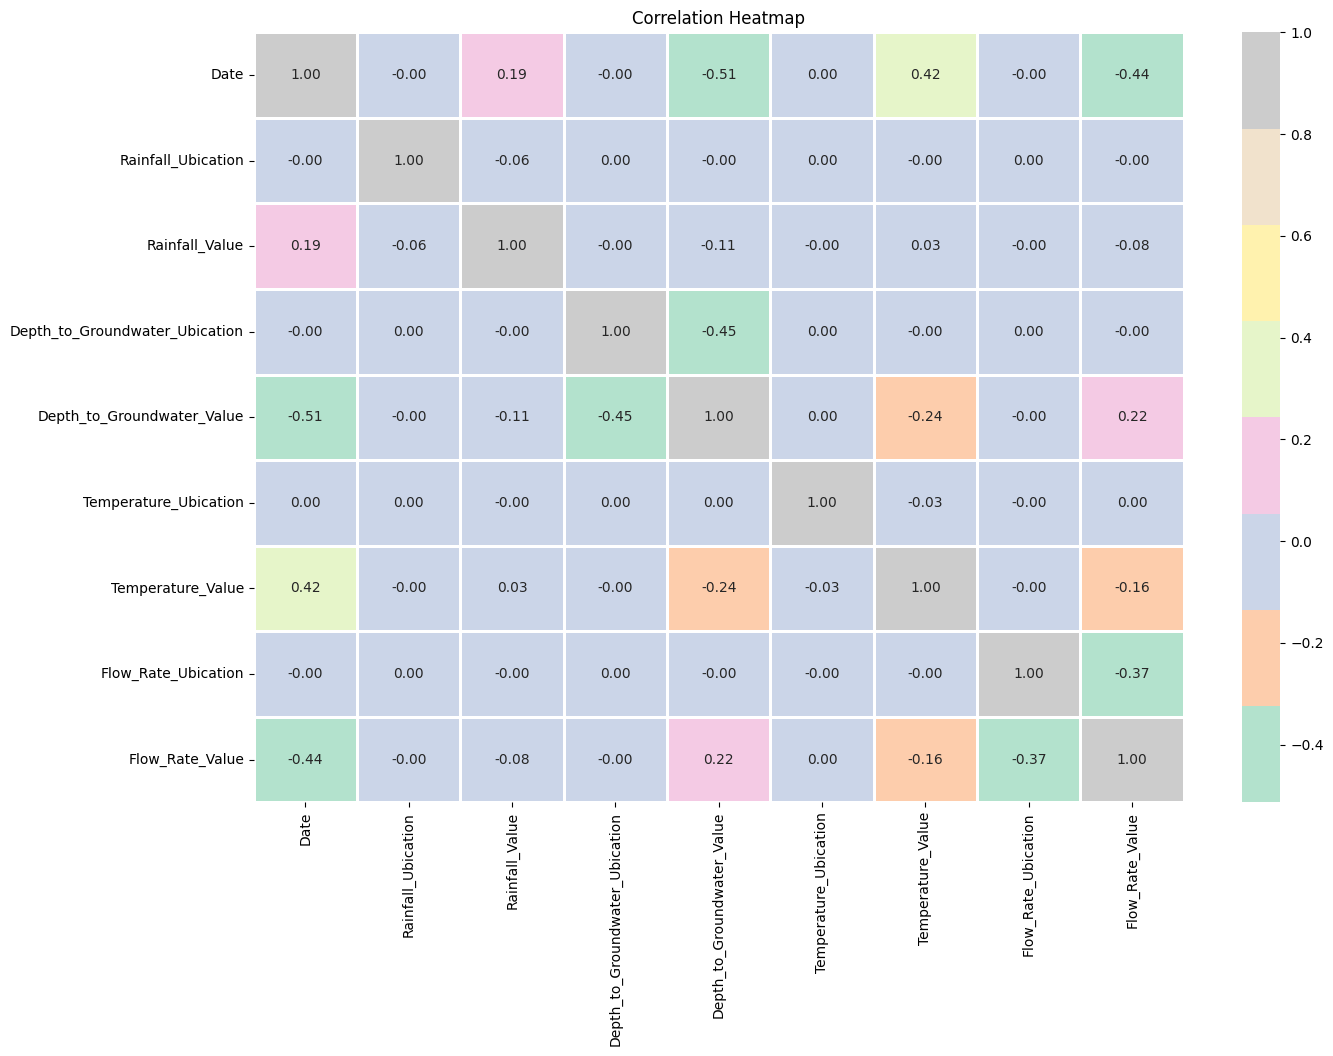

In [55]:
# Correlación entre variables
plt.figure(figsize=(15, 10))
sns.heatmap(df_ws_a.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

### Manantial Lupa. 

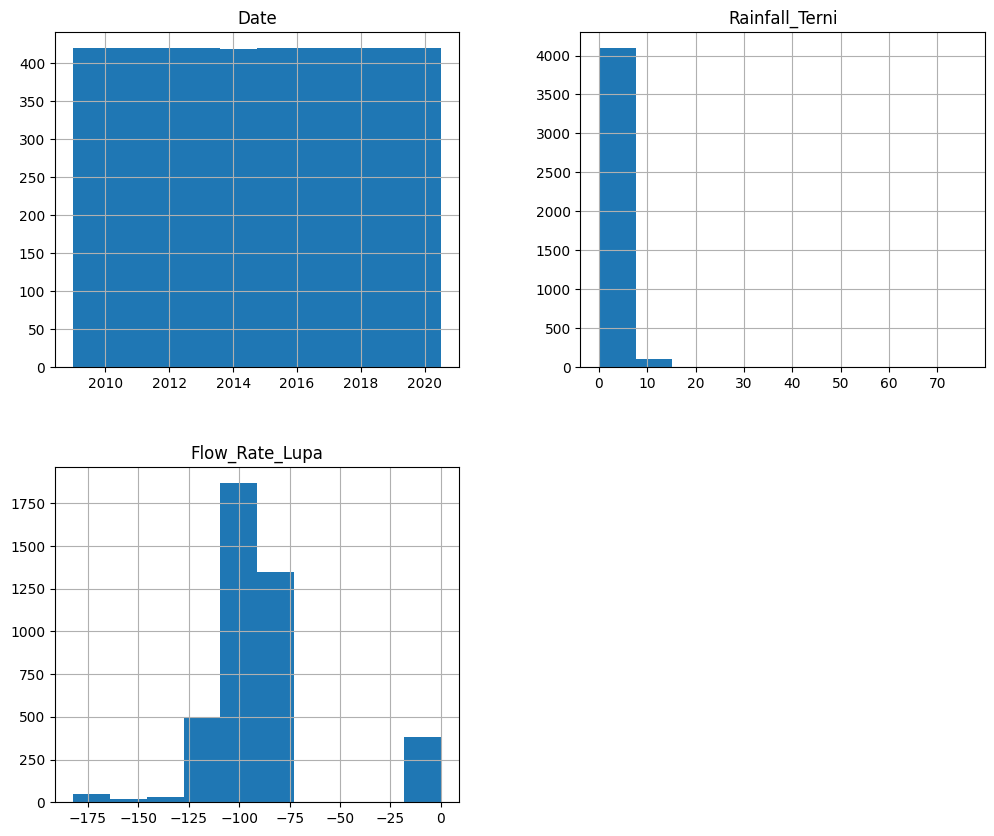

In [56]:
# Análisis Univariado de Acuífero Doganella
df_ws_l.hist(figsize=(12,10))
plt.show()

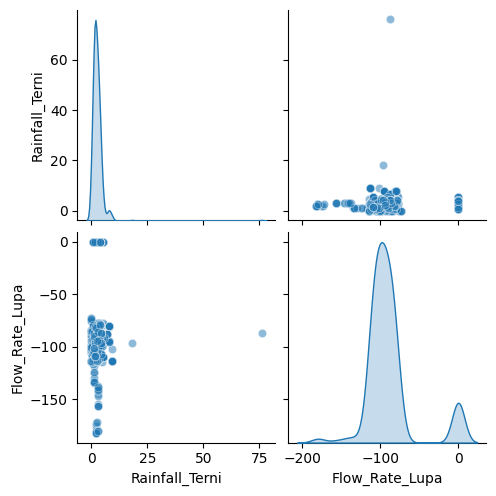

In [57]:
# Análisis Bivariado de Acuífero Doganella
df_sample_ws_l = df_ws_l.sample(n=1000) # O .sample(frac=0.01) para el 1% de los datos
sns.pairplot(df_sample_ws_l, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})

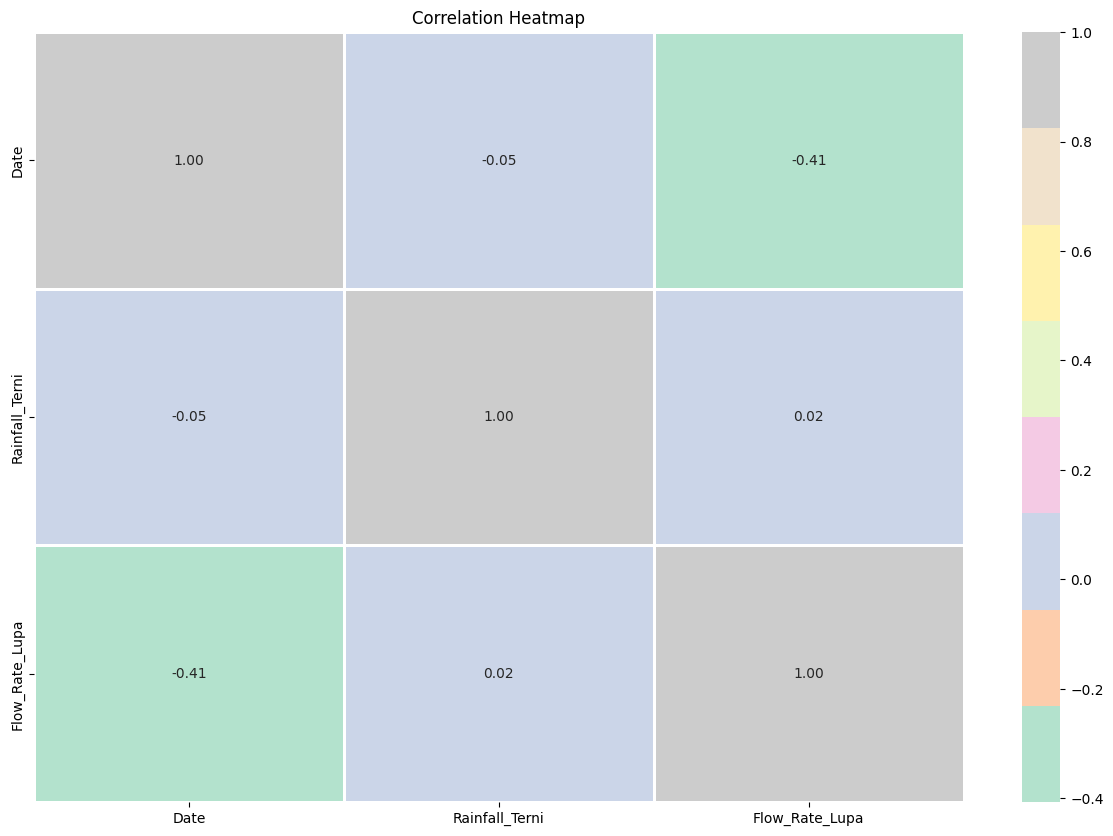

In [58]:
# Correlación de Acuífero Doganella
plt.figure(figsize=(15, 10))
sns.heatmap(df_ws_l.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

### Manantial Madonna di Conneto. 

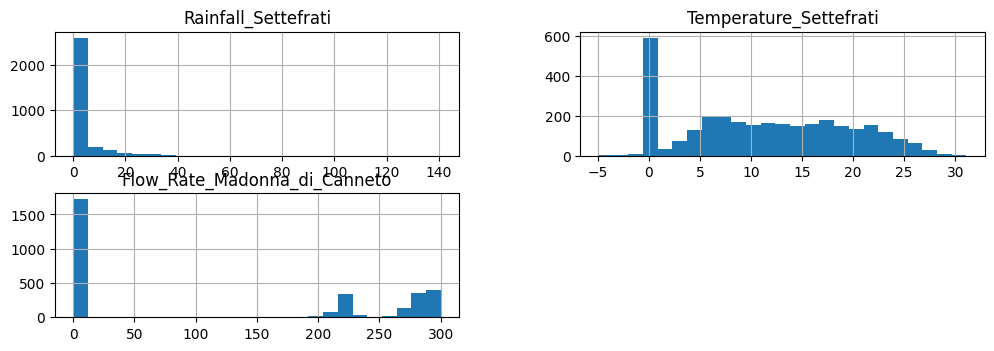

In [59]:
# Análisis Univariado de Acuífero Luco
df_ws_m.hist(figsize=(12,10), layout=(5, 2), bins=25)
plt.show()

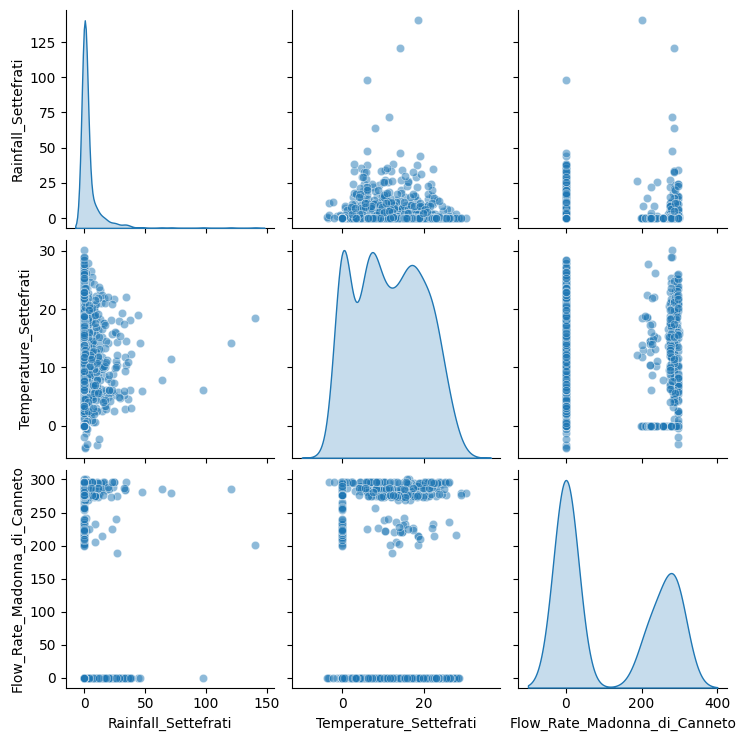

In [60]:
# Análisis Bivariado de Acuífero Luco
df_sample_ws_m = df_ws_m.sample(n=1000) # O .sample(frac=0.01) para el 1% de los datos
sns.pairplot(df_sample_ws_m, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})

In [61]:
#Correlación de Acuífero Luco
plt.figure(figsize=(15, 10))
sns.heatmap(df_ws_m.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: '01/01/2012'

<Figure size 1500x1000 with 0 Axes>

# 6. Guardar datos limpios. 

In [63]:
# Guardar el DataFrame limpio y preprocesado
df_ws_a.to_csv('../data/processed/water_spring/water_spring_amiata_clean.csv', index=False)
df_ws_l.to_csv('../data/processed/water_spring/water_spring_lupa_clean.csv', index=False)
df_ws_m.to_csv('../data/processed/water_spring/water_spring_madonna_clean.csv', index=False)